In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal
import enum

# Load captured data

This data was captured form a [KiwiSDR](http://kiwisdr.com/public/). The SDR was configured for Continuous Wave Narrow (CWN) with a sample rate of 12 ksps and a centre frequency of 60 kHz.

In [2]:
fs_hz, signal = scipy.io.wavfile.read("g4bkhkiwi.ddns.net_2022-11-19T01_35_01Z_60.00_cwn.wav")
signal = signal.astype(float)

Text(0, 0.5, 'Frequency (Hz)')

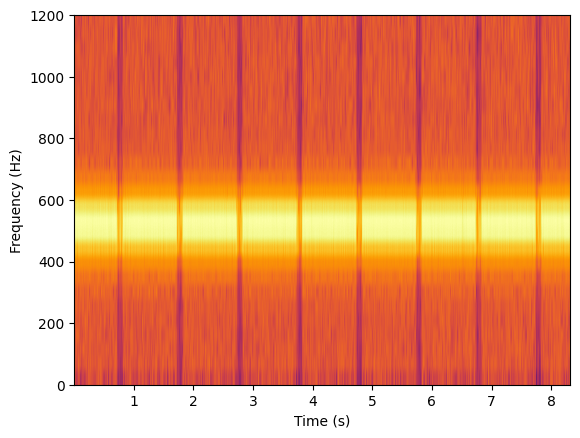

In [3]:
fig, ax = plt.subplots()
ax.specgram(signal[:100000], Fs=fs_hz, NFFT=256, noverlap=192, cmap="inferno")
ax.set_ylim(0, 1200)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")

# Digitise

Extract a digital signal at 1 ksps from the raw data

In [4]:
# Extract envelope
envelope = np.abs(scipy.signal.hilbert(signal))

# Low pass filter
filter_len_s = 0.04
filter_len_samples = round(filter_len_s * fs_hz)
filtered = scipy.signal.lfilter(np.ones(filter_len_samples)/filter_len_samples, 1, envelope)

# Threshold
threshold = (np.percentile(filtered, 95) + np.percentile(filtered, 5)) / 2
digitised = (filtered > threshold).astype(int)

# Resample
rate = fs_hz / 1000
idxs = np.arange(0, len(digitised), rate).astype(int)
digitised = digitised[idxs]

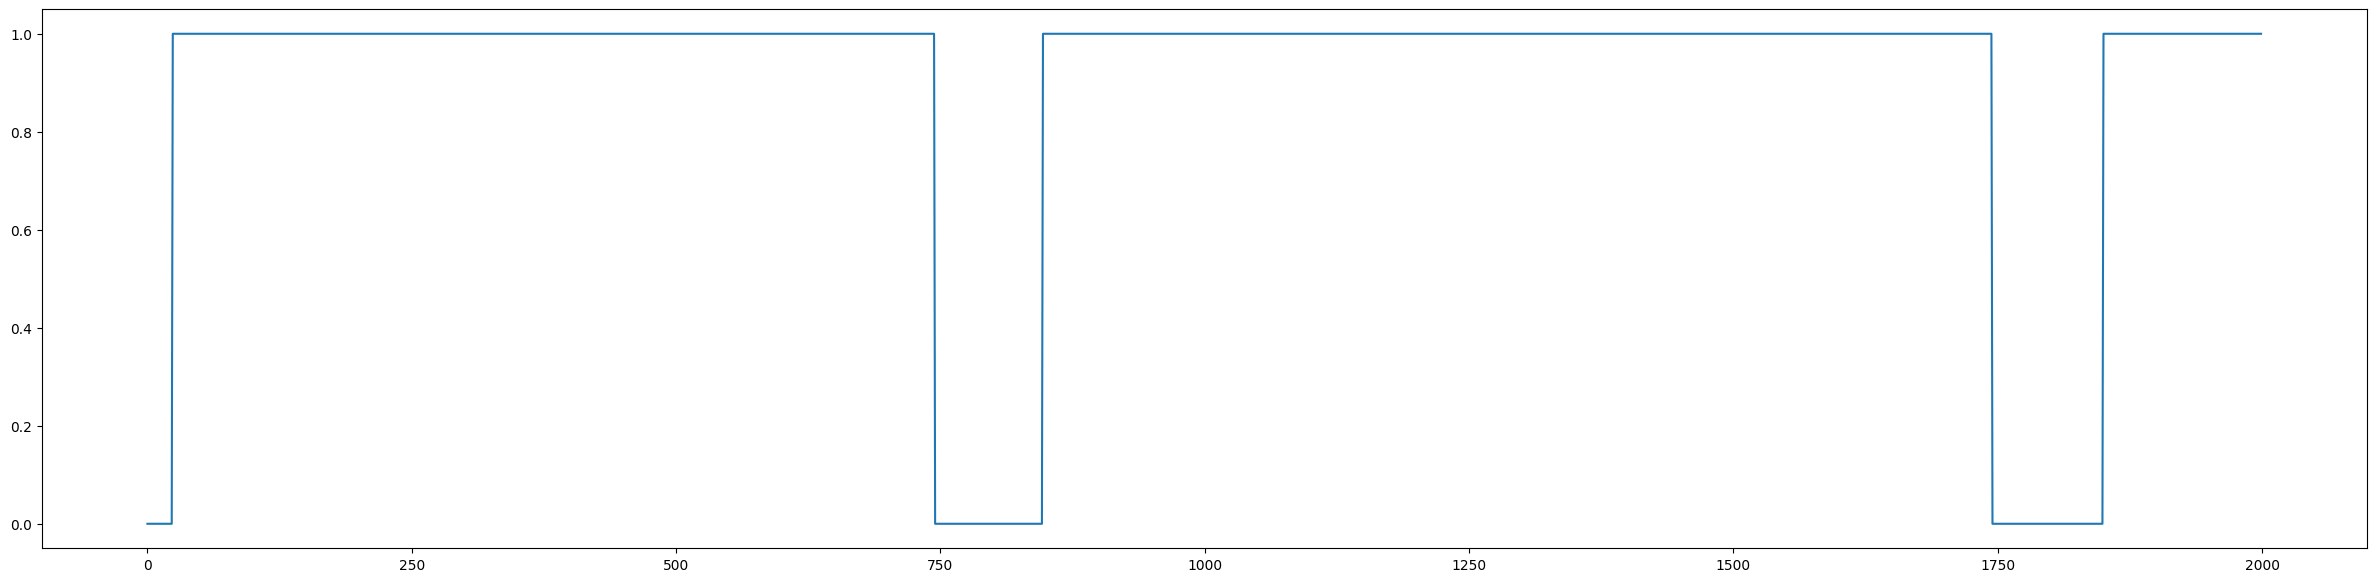

In [5]:
fig, ax = plt.subplots(figsize=(30, 7))
ax.plot(digitised[:2000])

# Save digital data

In [6]:
with open("test_data.csv", "wt") as f:
    for sample in digitised:
        print(sample, file=f)